# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pwd

/Users/niki/code/Niki827/watt_squad/notebooks


# Load Data

In [3]:
data = pd.read_csv("/Users/niki/code/Niki827/watt_squad/raw_data/train.csv")

In [4]:
data

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,...,t_50m:C,relative_humidity_50m:p,dew_point_50m:C,wind_speed_50m:ms,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d
0,2020-01-01 13:00:00,0.0,40.59,26.514689,0.28969,0.0,0.0,1.0,10.0,64826.0,...,8.4,60.7,1.3,8.4,246.3,8.3,60.3,1.0,10.4,247.3
1,2020-01-01 14:00:00,0.0,67.86,28.326960,0.29561,0.0,0.0,1.0,0.0,8961.1,...,8.4,61.6,1.5,8.0,252.3,8.4,60.7,1.2,10.0,252.1
2,2020-01-01 15:00:00,0.0,116.68,23.682207,0.30044,0.0,0.0,1.0,0.0,0.0,...,8.5,60.3,1.3,9.6,254.1,8.4,59.6,1.0,11.7,253.8
3,2020-01-01 16:00:00,0.0,120.22,25.354782,0.29975,0.0,0.0,1.0,0.0,0.0,...,8.4,63.9,2.0,12.1,254.6,8.3,63.4,1.7,14.3,254.2
4,2020-01-01 17:00:00,0.0,109.86,23.861942,0.29650,0.0,0.0,1.0,0.0,0.0,...,7.2,78.9,3.8,11.7,249.5,7.1,77.9,3.5,13.9,249.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,2021-01-31 19:00:00,0.0,21.98,44.422658,0.60243,0.0,0.0,1.0,0.0,0.0,...,-3.2,93.1,-4.2,4.8,231.2,-3.1,91.6,-4.3,6.0,238.3
9511,2021-01-31 20:00:00,0.0,9.60,45.167707,0.53335,0.0,0.0,1.0,0.0,0.0,...,-3.5,94.1,-4.3,4.9,224.9,-3.3,92.1,-4.4,6.2,231.8
9512,2021-01-31 21:00:00,0.0,22.61,32.476198,0.51195,0.0,0.0,1.0,0.0,0.0,...,-3.6,93.0,-4.6,4.7,224.5,-3.3,90.6,-4.6,6.0,231.7
9513,2021-01-31 22:00:00,0.0,21.70,28.561791,0.47122,0.0,0.0,1.0,0.0,0.0,...,-3.7,92.1,-4.8,4.5,222.8,-3.4,89.5,-4.9,5.8,231.1


# How to create cyclical features - Input

To create a time engineered feature based on a column which gives the second in the day!

seconds_in_day = 24*60*60

df['sin_time'] = np.sin(2*np.pi*df.seconds/2)
df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_in_day)
df.drop(columns=['seconds'], inplace=True)

df.head()

# Cyclical Feature Engineering

In [5]:
data['wind_dir_2m:d'].max()

360.0

- sun_azimuth:d
- sun_elevation:d
- wind_dir_(2|10|50|100)m:d

In [6]:
degrees = 360

In [7]:
raw_features = ['sun_azimuth:d', 'wind_dir_2m:d', 'wind_dir_10m:d', 'wind_dir_50m:d', 'wind_dir_100m:d']

for raw_feature in raw_features:
    sin_column_name = f'sin_{raw_feature}'
    cos_column_name = f'cos_{raw_feature}'
    data[sin_column_name] = np.sin(2 * np.pi * data[raw_feature]/2)
    data[cos_column_name] = np.cos(2 * np.pi * data[raw_feature]/degrees)

In [8]:
data.columns

Index(['time', 'pv_production', 'wind_production', 'consumption',
       'spot_market_price', 'precip_1h:mm', 'precip_type:idx',
       'prob_precip_1h:p', 'clear_sky_rad:W', 'clear_sky_energy_1h:J',
       'diffuse_rad:W', 'diffuse_rad_1h:Wh', 'direct_rad:W',
       'direct_rad_1h:Wh', 'global_rad:W', 'global_rad_1h:Wh',
       'sunshine_duration_1h:min', 'sun_azimuth:d', 'sun_elevation:d',
       'low_cloud_cover:p', 'medium_cloud_cover:p', 'high_cloud_cover:p',
       'total_cloud_cover:p', 'effective_cloud_cover:p', 'temp',
       'relative_humidity_2m:p', 'dew_point_2m:C', 'wind_speed_2m:ms',
       'wind_dir_2m:d', 't_10m:C', 'relative_humidity_10m:p',
       'dew_point_10m:C', 'wind_speed_10m:ms', 'wind_dir_10m:d', 't_50m:C',
       'relative_humidity_50m:p', 'dew_point_50m:C', 'wind_speed_50m:ms',
       'wind_dir_50m:d', 't_100m:C', 'relative_humidity_100m:p',
       'dew_point_100m:C', 'wind_speed_100m:ms', 'wind_dir_100m:d',
       'sin_sun_azimuth:d', 'cos_sun_azimuth:d', '

# Correlation Matrix

In [9]:
correlation_matrix = data.corr()

/var/folders/gq/yvbczhns39z5_88fyxvxmxy00000gn/T/ipykernel_31543/2558734126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [10]:
import matplotlib.pyplot as plt

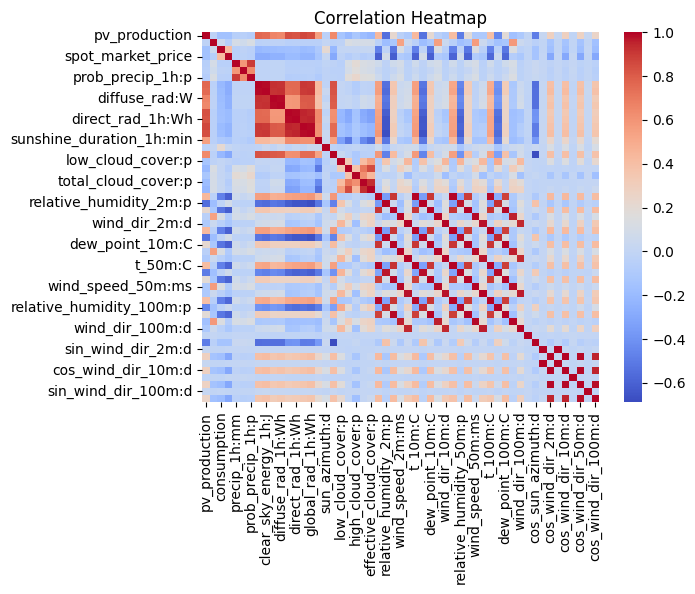

In [11]:
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
data

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,...,sin_sun_azimuth:d,cos_sun_azimuth:d,sin_wind_dir_2m:d,cos_wind_dir_2m:d,sin_wind_dir_10m:d,cos_wind_dir_10m:d,sin_wind_dir_50m:d,cos_wind_dir_50m:d,sin_wind_dir_100m:d,cos_wind_dir_100m:d
0,2020-01-01 13:00:00,0.0,40.59,26.514689,0.28969,0.0,0.0,1.0,10.0,64826.0,...,0.882291,-0.922834,-9.510565e-01,-0.416281,-9.510565e-01,-0.416281,0.809017,-0.401948,-0.809017,-0.385906
1,2020-01-01 14:00:00,0.0,67.86,28.326960,0.29561,0.0,0.0,1.0,0.0,8961.1,...,0.288029,-0.808062,9.510565e-01,-0.302370,9.510565e-01,-0.302370,0.809017,-0.304033,0.309017,-0.307357
2,2020-01-01 15:00:00,0.0,116.68,23.682207,0.30044,0.0,0.0,1.0,0.0,0.0,...,-0.575005,-0.653487,8.090170e-01,-0.270600,8.090170e-01,-0.270600,0.309017,-0.273959,-0.587785,-0.278991
3,2020-01-01 16:00:00,0.0,120.22,25.354782,0.29975,0.0,0.0,1.0,0.0,0.0,...,0.134678,-0.468809,2.057035e-14,-0.258819,2.057035e-14,-0.258819,0.951057,-0.265556,0.587785,-0.272280
4,2020-01-01 17:00:00,0.0,109.86,23.861942,0.29650,0.0,0.0,1.0,0.0,0.0,...,0.478998,-0.261499,-9.510565e-01,-0.351842,-9.510565e-01,-0.351842,-1.000000,-0.350207,-0.809017,-0.346936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,2021-01-31 19:00:00,0.0,21.98,44.422658,0.60243,0.0,0.0,1.0,0.0,0.0,...,-0.963724,0.200839,-9.510565e-01,-0.699663,-9.510565e-01,-0.699663,-0.587785,-0.626604,0.809017,-0.525472
9511,2021-01-31 20:00:00,0.0,9.60,45.167707,0.53335,0.0,0.0,1.0,0.0,0.0,...,0.656586,0.441944,-8.090170e-01,-0.773840,-8.090170e-01,-0.773840,0.309017,-0.708340,-0.587785,-0.618408
9512,2021-01-31 21:00:00,0.0,22.61,32.476198,0.51195,0.0,0.0,1.0,0.0,0.0,...,0.756310,0.672664,8.090170e-01,-0.780430,8.090170e-01,-0.780430,1.000000,-0.713250,-0.809017,-0.619779
9513,2021-01-31 22:00:00,0.0,21.70,28.561791,0.47122,0.0,0.0,1.0,0.0,0.0,...,0.012566,0.866060,5.877853e-01,-0.806960,5.877853e-01,-0.806960,0.587785,-0.733730,-0.309017,-0.627963


# Scaling

In [13]:
columns = data.columns

In [14]:
columns

Index(['time', 'pv_production', 'wind_production', 'consumption',
       'spot_market_price', 'precip_1h:mm', 'precip_type:idx',
       'prob_precip_1h:p', 'clear_sky_rad:W', 'clear_sky_energy_1h:J',
       'diffuse_rad:W', 'diffuse_rad_1h:Wh', 'direct_rad:W',
       'direct_rad_1h:Wh', 'global_rad:W', 'global_rad_1h:Wh',
       'sunshine_duration_1h:min', 'sun_azimuth:d', 'sun_elevation:d',
       'low_cloud_cover:p', 'medium_cloud_cover:p', 'high_cloud_cover:p',
       'total_cloud_cover:p', 'effective_cloud_cover:p', 'temp',
       'relative_humidity_2m:p', 'dew_point_2m:C', 'wind_speed_2m:ms',
       'wind_dir_2m:d', 't_10m:C', 'relative_humidity_10m:p',
       'dew_point_10m:C', 'wind_speed_10m:ms', 'wind_dir_10m:d', 't_50m:C',
       'relative_humidity_50m:p', 'dew_point_50m:C', 'wind_speed_50m:ms',
       'wind_dir_50m:d', 't_100m:C', 'relative_humidity_100m:p',
       'dew_point_100m:C', 'wind_speed_100m:ms', 'wind_dir_100m:d',
       'sin_sun_azimuth:d', 'cos_sun_azimuth:d', '

In [15]:
data['prob_precip_1h:p'].describe()

count    9515.000000
mean        3.312181
std        10.585675
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        95.000000
Name: prob_precip_1h:p, dtype: float64

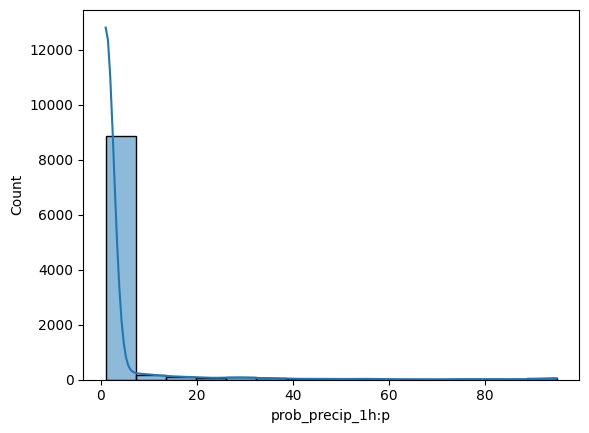

In [16]:
sns.histplot(data['prob_precip_1h:p'], kde=True);

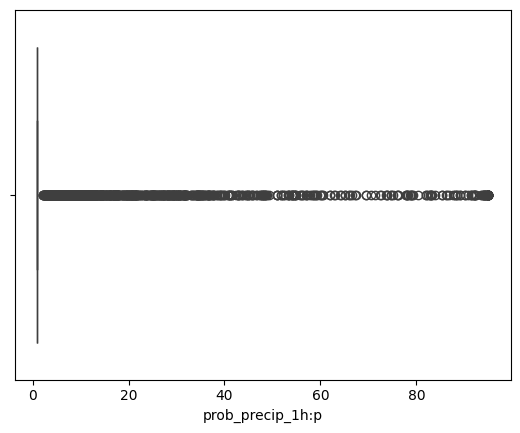

In [17]:
sns.boxplot(data=data, x='prob_precip_1h:p');

# Log Transformations

## precip_1h:mm

import pandas as pd

Assuming `df` is a DataFrame with a column named 'feature'

epsilon = 1e-5

df['log_feature'] = np.log(df['feature'] + epsilon)

In [18]:
import pandas as pd

epsilon = 1e-5
data['log_precip_1h:mm'] = np.log(data['precip_1h:mm'] + epsilon)

In [19]:
data['log_precip_1h:mm'].describe()

count    9515.000000
mean      -10.538655
std         3.073472
min       -11.512925
25%       -11.512925
50%       -11.512925
75%       -11.512925
max         1.827772
Name: log_precip_1h:mm, dtype: float64

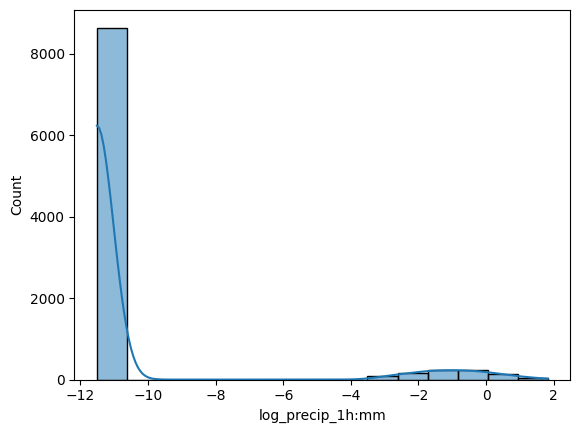

In [20]:
sns.histplot(data['log_precip_1h:mm'], kde=True);

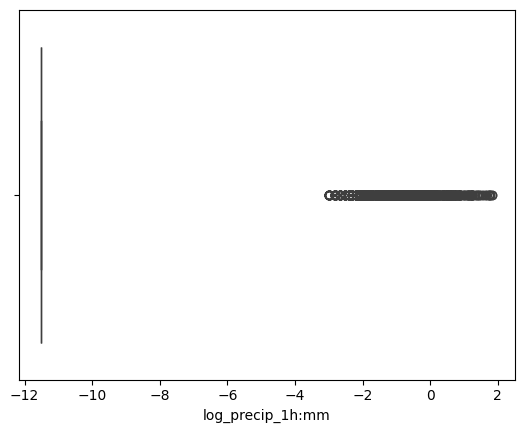

In [21]:
sns.boxplot(data=data, x='log_precip_1h:mm');

## prob_precip_1h:p

In [22]:
epsilon = 1e-5
data['log_prob_precip_1h:p'] = np.log(data['prob_precip_1h:p'] + epsilon)

In [23]:
data['log_prob_precip_1h:p'].describe()

count    9515.000000
mean        0.257360
std         0.863391
min         0.000010
25%         0.000010
50%         0.000010
75%         0.000010
max         4.553877
Name: log_prob_precip_1h:p, dtype: float64

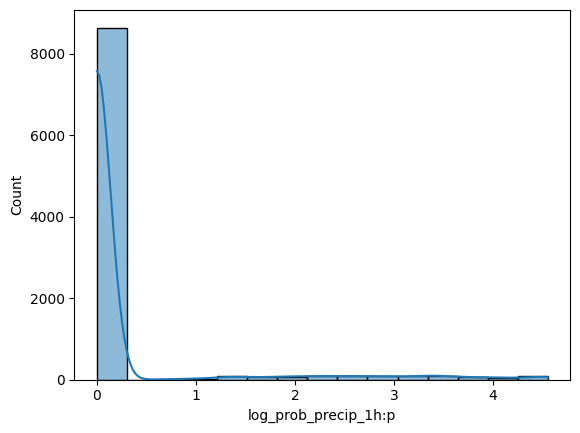

In [24]:
sns.histplot(data['log_prob_precip_1h:p'], kde=True);

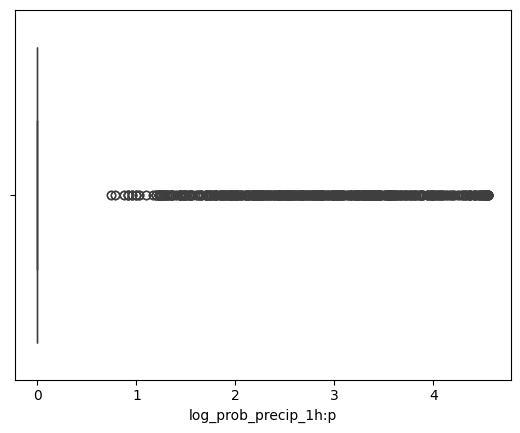

In [25]:
sns.boxplot(data=data, x='log_prob_precip_1h:p');